# Final Exam, MTH 5401
# Graf, Nathan J.

1. (4 points) Problem 12-56 a), b), & c)
2. (4 points) Problem 12-94 all parts but NOT a) ; use alpha to enter = .15 and alpha to leave = .15
3. (4 points) Problem 13-8 a), b), & c); problem and chart is on page 556.
4. (4 points) Problem 13-36 a), b), c), and d)
5. (2 points) Problem 13-48 a) use alpha = .05
6. (4 points) Problem 14-2 a), b), & c)
7. (4 points) Problem 14-16 (should say 2^5, not 25 in the problem) do a) and b)
8. (4 points) Problem 14-36 a) and b) {i.e. are any factors significant}
9. (3 points) Problem 14-69 a) and b); use Y = 15 + 1.6X1 – 3.2X2 + 2.1X3 – 1.6X4 instead of the first-order model in the book.
10. (2 points) Problem 14-52 a) and b) 

## 1. (12-56 a, b, c)

### 12-56 a) 95% CI for $\beta_{1}$, $\beta_{2}$, $\beta_{3}$, and $\beta_{4}$


In [143]:
import pandas as pd

data = pd.read_csv('12_55.csv')
data

,x0,x1,x2,x3,x4,y
0,1,25,24,91,100,240
1,1,31,21,90,95,236
2,1,45,24,88,110,270
3,1,60,25,87,88,274
4,1,65,25,91,94,301
5,1,72,26,94,99,316
6,1,80,25,87,97,300
7,1,84,25,86,96,296
8,1,75,24,88,110,267
9,1,60,25,91,105,276


In [144]:
import numpy as np
np.mat(data[['x0', 'x1', 'x2', 'x3', 'x4']])

matrix([[  1,  25,  24,  91, 100],
        [  1,  31,  21,  90,  95],
        [  1,  45,  24,  88, 110],
        [  1,  60,  25,  87,  88],
        [  1,  65,  25,  91,  94],
        [  1,  72,  26,  94,  99],
        [  1,  80,  25,  87,  97],
        [  1,  84,  25,  86,  96],
        [  1,  75,  24,  88, 110],
        [  1,  60,  25,  91, 105],
        [  1,  50,  25,  90, 100],
        [  1,  38,  23,  89,  98]], dtype=int64)

In [145]:
X = np.mat(data[['x0', 'x1', 'x2', 'x3', 'x4']])
Y = np.mat(data['y'])
print(X)
print(Y)

[[  1  25  24  91 100]
 [  1  31  21  90  95]
 [  1  45  24  88 110]
 [  1  60  25  87  88]
 [  1  65  25  91  94]
 [  1  72  26  94  99]
 [  1  80  25  87  97]
 [  1  84  25  86  96]
 [  1  75  24  88 110]
 [  1  60  25  91 105]
 [  1  50  25  90 100]
 [  1  38  23  89  98]]
[[240 236 270 274 301 316 300 296 267 276 288 261]]


In [146]:
regressors = ((X.transpose()*X)**-1)*X.transpose()*Y.transpose()

In [147]:
regressors

matrix([[-123.13124627],
        [   0.75728909],
        [   7.51878396],
        [   2.48307855],
        [  -0.48113523]])

In [148]:
import statsmodels.formula.api as sm

data1 = data[['x1', 'x2', 'x3', 'x4', 'y']]
result = sm.ols(formula='y~x1+x2+x3+x4', data=data1).fit()

print(result.params)

Intercept   -123.131246
x1             0.757289
x2             7.518784
x3             2.483079
x4            -0.481135
dtype: float64


In [149]:
print(result.resid)

0    -14.098421
1     -0.008401
2     13.016385
3     -9.963632
4      6.204420
5      3.341053
6      5.220804
7      0.193590
8    -12.702288
9     -9.716647
10     9.933646
11     8.579491
dtype: float64


In [150]:
resids = result.resid
n = 12
p = 4
variance = (resids**2).sum()/(n-p)
variance

121.55798180259414

In [151]:
# SSE = y'y - BhatX'y
# but Bhat is actually the transpose of the previous Bhat
# it is a row, not a column
beta_hat = np.mat(result.params)
SSE = Y*Y.transpose() - beta_hat*X.transpose()*Y.transpose()
n = 12
p = 4

variance = SSE/(n - p)
variance

matrix([[121.5579818]])

In [152]:
from scipy import stats
# calculate t value
alpha = 0.05

t_a = abs(stats.t.ppf(alpha/2, n-p))
t_a

2.306004135033371

In [153]:
import math 

C = (X.transpose() * X)**-1

# loop from 0 - 3 and calculate intervals
for i in range(1, p+1):
    lower = beta_hat[0, i] - t_a * math.sqrt(variance*C[i,i])
    upper = beta_hat[0, i] + t_a * math.sqrt(variance*C[i,i])
    print('{} <= B{} <= {}'.format(lower, i, upper))

0.15527308216574065 <= B1 <= 1.359305094875228
-1.1313260528921685 <= B2 <= 16.16889396372833
-1.4198916734044218 <= B3 <= 6.386048782698197
-1.6786844403830763 <= B4 <= 0.7164139773300429


In other words the Confidence intervals for $\hat{\beta_{i}}$ $i \in 1, 2, 3, 4$ are:   
$0.15527 \leq \hat{\beta_{1}} \leq 1.3593$  
$-1.1313 \leq \hat{\beta_{2}} \leq 16.169$  
$-1.4199 \leq \hat{\beta_{3}} \leq 6.3860$  
$-1.6787 \leq \hat{\beta_{4}} \leq 0.71641$  

### 12-56 (b)  95% CI on mean of Y for $x_1 = 75, x_2 = 24, x_3 = 90, x_4 = 98$ 


In [154]:
#t_a and most of the data is the same, for the formula, we construct a vector of the x-values
X_0 = np.mat([1, 75, 24, 90, 98]).transpose()
X_0

matrix([[ 1],
        [75],
        [24],
        [90],
        [98]])

In [155]:
# mu_hat is predicted value
mu_hat = beta_hat*X_0

# formula mu_hat +- t*sqrt(variance*X_0'(X'X)**-1)
lower = mu_hat - t_a * math.sqrt(variance*X_0.transpose()*C[i,i]*X_0)
upper = mu_hat + t_a * math.sqrt(variance*X_0.transpose()*C[i,i]*X_0)
print('{} <= mu_Y|X_0 <= {}'.format(lower, upper))

[[105.28221519]] <= mu_Y|X_0 <= [[475.60191987]]


$105.28 \leq \mu_{Y|x{0}} \leq 475.60$  

### 12-56 (c) 95% prediction

In [156]:
# formula y_hat(mu_hat) +- t*sqrt(variance*X_0'(X'X)**-1)
lower = mu_hat - t_a * math.sqrt(variance*(1 + X_0.transpose()*C[i,i]*X_0))
upper = mu_hat + t_a * math.sqrt(variance*(1 + X_0.transpose()*C[i,i]*X_0))
print('{} <= Y_0 <= {}'.format(lower, upper))

[[103.54483819]] <= Y_0 <= [[477.33929687]]


$103.54 \leq \mu_{Y_0} \leq 477.34$  

## 2. (12-94 (not a))

### 12-94 (b) stepwise regression ($\alpha$ to leave = 0.15

In [157]:
# import data
data = pd.read_csv('12_12.csv')
Y = np.mat(data['y']).transpose()
X = np.mat(data[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']])

In [158]:
data1 = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y']]
result = sm.ols(formula='y~x1+x2+x3+x4+x5+x6', data=data1).fit()


In [159]:
data1.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y'], dtype='object')

In [160]:
result.rsquared

0.7112548532657963

In [161]:
# let's cycle through the variables and choose the strongest one
for var in data1.columns[:-1]:
    form = 'y~' + var
    result = sm.ols(formula=form, data=data1).fit()
    message = 'for ' + var
    message += ' the correlation is: '
    message += str(result.fvalue)
    print(message)

for x1 the correlation is: 1.9810147791674546
for x2 the correlation is: 1.1303164472820604
for x3 the correlation is: 15.519961240723473
for x4 the correlation is: 7.663962604496091
for x5 the correlation is: 2.1457366821308637
for x6 the correlation is: 1.1149533007407104


In [162]:
# let's cycle through the variables and choose the strongest one
for var in data1.columns[:-1]:
    form = 'y~x3 + ' + var
    result = sm.ols(formula=form, data=data1).fit()
    message = 'for ' + var
    message += ' the correlation is: '
    message += str(result.pvalues)
    print(message)

for x1 the correlation is: Intercept    0.055334
x3           0.002426
x1           0.361784
dtype: float64
for x2 the correlation is: Intercept    0.765341
x3           0.000869
x2           0.156675
dtype: float64
for x3 the correlation is: Intercept    0.082078
x3           0.001057
dtype: float64
for x4 the correlation is: Intercept    0.477052
x3           0.001246
x4           0.013357
dtype: float64
for x5 the correlation is: Intercept    0.994074
x3           0.000766
x5           0.078927
dtype: float64
for x6 the correlation is: Intercept    0.301998
x3           0.002170
x6           0.577429
dtype: float64


In [163]:
import statsmodels.api as sm

X = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
y = data['y']


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.15, 
                       threshold_out = 0.15, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  x3                             with p-value 0.00105705
Add  x4                             with p-value 0.0133574
resulting features:
['x3', 'x4']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


The variables added using stepwise regression were $x_{3}$ and $x_{4}$

### 12-94 (c) Forward Selection

Since none of the variables got removed from the stepwise regression, forward selection will have identical results:
the resulting regressors are $x_{3}$ and $x_{4}$

### 12-94 (d) Backward Elimination



In [164]:
# import data
data = pd.read_csv('12_12.csv')
Y = np.mat(data['y']).transpose()
X = np.mat(data[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']])
data1 = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y']]
result = sm.formula.ols(formula='y~x1+x2+x3+x4+x5+x6', data=data1).fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     4.927
Date:                Tue, 11 Dec 2018   Prob (F-statistic):            0.00921
Time:                        00:52:31   Log-Likelihood:                -20.467
No. Observations:                  19   AIC:                             54.93
Df Residuals:                      12   BIC:                             61.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1368      8.110      0.387      0.7

In [165]:
# remove x2 and try again since it had the highest p-value
result = sm.formula.ols(formula='y~x1+x3+x4+x5+x6', data=data1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     6.403
Date:                Tue, 11 Dec 2018   Prob (F-statistic):            0.00328
Time:                        00:52:31   Log-Likelihood:                -20.468
No. Observations:                  19   AIC:                             52.94
Df Residuals:                      13   BIC:                             58.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0804      7.667      0.402      0.6

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [166]:
# remove x6 and try again since it had the highest p-value
result = sm.formula.ols(formula='y~x1+x3+x4+x5', data=data1).fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     7.693
Date:                Tue, 11 Dec 2018   Prob (F-statistic):            0.00170
Time:                        00:52:31   Log-Likelihood:                -21.224
No. Observations:                  19   AIC:                             52.45
Df Residuals:                      14   BIC:                             57.17
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9644      7.469      0.665      0.5

In [167]:
# remove x5 and try again since it had the highest p-value
result = sm.formula.ols(formula='y~x1+x3+x4', data=data1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     10.27
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           0.000630
Time:                        00:52:31   Log-Likelihood:                -21.660
No. Observations:                  19   AIC:                             51.32
Df Residuals:                      15   BIC:                             55.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4193      6.700      0.361      0.7

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


Finally, with a *p*-value of 0.301, we remove x1.

In [168]:
# remove x2 and try again since it had the highest p-value
result = sm.formula.ols(formula='y~x3+x4', data=data1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     14.70
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           0.000238
Time:                        00:52:31   Log-Likelihood:                -22.360
No. Observations:                  19   AIC:                             50.72
Df Residuals:                      16   BIC:                             53.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6563      6.395      0.728      0.4

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


We are left with x3 and x4, just like before.

### 12-94 (e) All the models ended up the same. With only 2 regressors and much lower *p*-values, a model with x3 and x4 would be the most preferred.

## 3. 13-8 

### 13-8 (a) $\alpha = 0.01$

f_0 is: 4.006141248720574
p-value is: 0.04648445325738717


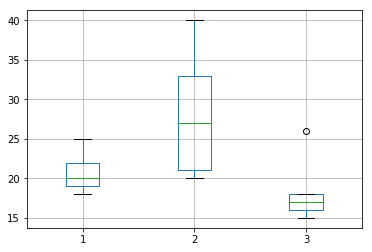

In [169]:
data = pd.DataFrame({'1': [19, 22, 20, 18, 25], 
                     '2': [20, 21, 33, 27, 40], 
                     '3': [16, 15, 18, 26, 17]})
f_val, p_val = stats.f_oneway(data['1'], data['2'], data['3'])

data.boxplot()

print("f_0 is: " + str(f_val) )
print("p-value is: " + str(p_val) )

With a *p*-value of 0.0465, do not reject $H_{0}$. 

### 13-8 (b) Analyze residuals:


In [170]:
# new list of lists of residuals
residuals = []
allresids = []

# for each column of the dataframe
for treatment in data:
    # new list of residuals
    resids = []
    # calculate mean of the treatmen
    mean = data[treatment].mean()
    # for each observation
    for i in data[treatment]:
        # calculate and append the residual
        resids.append( i - mean )
        allresids.append( i - mean )
    # append treatment residuals to experiment residuals
    residuals.append(resids)
    
residuals = pd.DataFrame({'1': residuals[0], '2': residuals[1], '3': residuals[2]})

residuals

,1,2,3
0,-1.8,-8.2,-2.4
1,1.2,-7.2,-3.4
2,-0.8,4.8,-0.4
3,-2.8,-1.2,7.6
4,4.2,11.8,-1.4


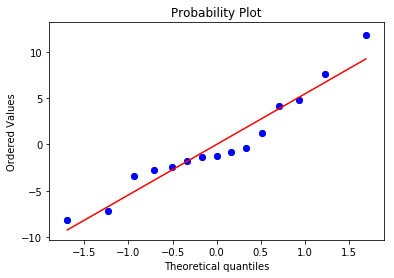

In [171]:
from matplotlib import pyplot as plt

coords, z = stats.probplot(residuals.unstack(), plot=plt)
x = coords[0]
y = coords[1]

plt.scatter(x, y)
plt.show()

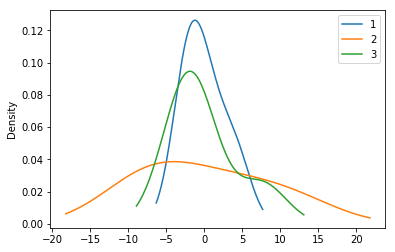

In [172]:
residuals.plot.density()

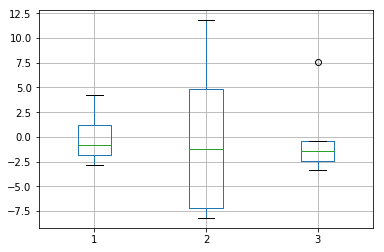

In [173]:
residuals.boxplot()

There are some issues with the residuals. There appears to be more variation in the type 2 circuit. Also, the type 3 has a signifcant outlier. 

### 12-8 (c) 95% CI for mean response time on circuit 3

Formula:
$\bar{y}_{i.} - t_{\alpha/2,a(n-1)}\sqrt{MSE/n} \leq \mu_{i} \leq \bar{y}_{i.} + t_{\alpha/2,a(n-1)}\sqrt{MSE/n}$

In [175]:
# constants
a = 3
n = 5

y_bar = data['3'].mean()

# calculate t value
alpha = 0.025

t_a = abs(stats.t.ppf(alpha/2, a*(n-1)))
t_a

2.560032959301552

In [176]:
# calculate SSE
SSE = 0
for treatment in data:
    mean = data[treatment].mean()
    for i in data[treatment]:
        SSE += (i - mean) ** 2
SSE

390.8

In [177]:
# calculate MSE
MSE = SSE/(a*(n-1))
MSE

32.56666666666667

In [179]:
from math import sqrt

# calculate lower and upper bounds of confidence interval
lower = y_bar - t_a * sqrt(MSE/n)
upper = y_bar + t_a * sqrt(MSE/n)

print('The 95% confidence interval is ' + str(lower) + ' <= ' + 'mu_3' + ' <= ' + 
     str(upper) + '.')

The 95% confidence interval is 11.86648023834119 <= mu_3 <= 24.933519761658808.


## 4. 13-36

### 13-36 (a) Test for significance, $\alpha = 0.01$.

In [230]:
data = pd.read_csv('13_36.csv')

#data = pd.DataFrame({'1': [98, 97, 99, 96], '2': [91, 90, 93, 92], 
 #                    '3': [96, 95, 97, 95], '4': [95, 96, 99, 98]})

#f_val, p_val = stats.f_oneway(data['1'], data['2'], data['3'], data['4'])

f_val, p_val = stats.f_oneway(data['1'], data['2'], data['3'], data['4'], data['5'], data['6'])



print("f_0 is: " + str(f_val) )
print("p-value is: " + str(p_val) )

f_0 is: 4.598266190719021
p-value is: 0.0043975312683061625


With a *p*-value of 0.0044, reject $H_{0}$

### 13-36 (b) Estimate variability between batches

In [231]:
# means and totals
batch_means = data.mean()
batch_totals = data.sum()
total = batch_totals.sum()
total_mean = batch_means.mean()

# total number of measurements
n = len(data)
N = data.count().sum()
a = N / n

In [240]:
a

6.0

In [233]:
# get sums of squares to calculate ANOVA manually


# SST is difference between each measurement squared
# and the mean squared over N
SST = 0

for batch in data:
    for i in data[batch]:
        SST += ( i - total_mean ) **2
        
SST

115187.5

In [234]:
# SStr is total treatment square over number in treatment
SStr = 0 

for batch in batch_means:
    SStr += ( batch - total_mean ) **2
    
SStr = SStr * n    
SStr

56357.5

In [235]:
# SSE = SST = SStr
SSE = SST - SStr
SSE

58830.0

In [236]:
# degrees of freedom
# df of random factor (looms) = a - 1
df_factor = a -1

# df of error = a(n-1), where a is the number of factors
# and n is the number of observations per factor
df_error = a*(n-1)

# MStr = SStr / df_factor
# MSE = SSE / df_error
MStr = SStr / df_factor
MSE = SSE / df_error
F_0 = MStr/MSE
F_0

4.598266190719021

In [239]:
# variance due to batches is estimated by: 
# (MStr - MSE) / n

(MStr - MSE) / n

1764.05

The variability between batches is estimated at $1764.05$.  
### 13-36 (c) Estimate variability between samples within batches

This would be estimated by the mean square error, $MSE = 2451.25$

In [243]:
MSE

2451.25

### 13-36 (d) Analyze residuals

In [244]:
# new list of lists of residuals
residuals = []

# for each column of the dataframe
for treatment in data:
    # new list of residuals
    resids = []
    # calculate mean of the treatmen
    mean = data[treatment].mean()
    # for each observation
    for i in data[treatment]:
        # calculate and append the residual
        resids.append( i - mean )
    # append treatment residuals to experiment residuals
    residuals.append(resids)
    
residuals = pd.DataFrame({'1': residuals[0], '2': residuals[1], 
                         '3': residuals[2], '4': residuals[3], '5': residuals[4]})

residuals

,1,2,3,4,5
0,40.0,12.0,31.0,-53.0,-5.0
1,-65.0,27.0,-14.0,-58.0,30.0
2,-65.0,-38.0,41.0,97.0,-85.0
3,15.0,32.0,-54.0,-33.0,35.0
4,75.0,-33.0,-4.0,47.0,25.0


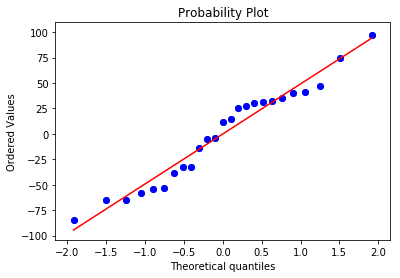

In [245]:
from matplotlib import pyplot as plt

coords, z = stats.probplot(residuals.unstack(), plot=plt)
x = coords[0]
y = coords[1]

plt.scatter(x, y)
plt.show()

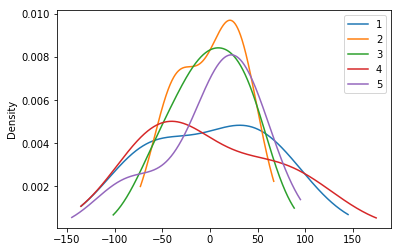

In [246]:
residuals.plot.density()

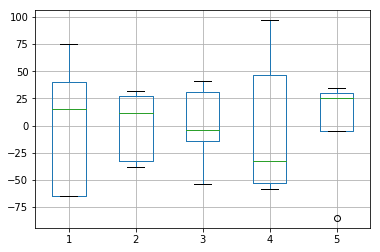

In [249]:
residuals.boxplot()

The residuals look mostly reasonable. Most of the residuals plot near the normal probability plot line. By the density plots and boxplots, it is possible that the variation is not consistent across the batches.  

## 5. (13-48 )

### 13-48 (a) Test for differences, $\alpha = 0.05$

In [251]:
data = pd.read_csv('13_48.csv')
data

,1,2,3,4
0,9.3,9.4,9.2,9.7
1,9.4,9.3,9.4,9.6
2,9.6,9.8,9.5,10.0
3,10.0,9.9,9.7,10.2


In [252]:
# For RCBD, we get the totals for each block
# in addition to each treatment
tr_means = data.mean()
tr_totals = data.sum()
block_means = data.transpose().mean()
block_totals = data.transpose().sum()
total = tr_totals.sum()
total_mean = tr_means.mean()



# total number of measurements
n = len(data)
N = data.count().sum()
a = N / n

# SST is difference between each measurement squared
# and the mean squared over N
SST = 0

for treatment in data:
    for i in data[treatment]:
        SST += ( i - total_mean ) **2
        
# SStr is number of observations times the square of
# the treatment mean minus the total mean
SStr = 0 

for treatment in tr_means:
    SStr += ( treatment - total_mean ) **2
    
SStr = SStr * n    

## SSb is the block means minus the 
SSb = 0

for block in block_means:
    SSb += ( block - total_mean ) **2
    
SSb = SSb * a


# SSE = SST - SStr
SSE = SST - SStr - SSb
SSE

# degrees of freedom
# df of random treatments = a - 1
df_treatments = a - 1

# df of blocks
df_block = n - 1

# df of error = a(n-1), where a is the number of factors
# and n is the number of observations per factor
df_error = (a-1)*(n-1)

# MStr = SStr / df_factor
# MSE = SSE / df_error
MStr = SStr / df_treatments
MSE = SSE / df_error
F_0 = MStr/MSE
F_0

14.437499999999618

In [253]:
stats.f.sf(F_0, df_treatments, df_error)

0.0008712720711117495

With a *p*-value of 0.00087, reject $H_{0}$. The tip does affect the hardness meaurements.

### 13-48 (b) Use Fisher's LSD to investigate differences.

In [257]:
# means to compare
tr_means 

1    9.575
2    9.600
3    9.450
4    9.875
dtype: float64

In [258]:
# get t_a/2, error df
alpha = 0.05
t_a = abs(stats.t.ppf(alpha/2, df_error))

In [260]:
LSD = t_a*math.sqrt(2*MSE/4)
LSD

0.15081047751606821

In [268]:
# check for differences greater than 0.1508
for i in range(len(tr_means)):
    for j in range(len(tr_means)):
        if i != j:
            diff = tr_means[i] - tr_means[j]
            if abs(diff) > LSD:
                print('|{} - {}| = {} is greater than LSD'.format(i, j, diff ))

|0 - 3| = -0.29999999999999893 is greater than LSD
|1 - 3| = -0.2749999999999986 is greater than LSD
|2 - 3| = -0.4250000000000007 is greater than LSD
|3 - 0| = 0.29999999999999893 is greater than LSD
|3 - 1| = 0.2749999999999986 is greater than LSD
|3 - 2| = 0.4250000000000007 is greater than LSD


Type 4's mean is 0.3 greater than Type 1, 0.275 greater than Type 2, and 0.425 greater than Type 3. The other differences are not significant.

### 13-48 (c) Analyze residuals

In [269]:
resids = []
treatments = len(data)
blocks = len(data.iloc[0])

for i in range(treatments):
    resids.append([])
    for j in range(blocks):
        fitted_val = tr_means[j] + block_means[i] - total_mean
        resid = data.iloc[i][j] - fitted_val
        resids[i].append(resid)
resids = pd.DataFrame(resids)
resids

,0,1,2,3
0,-0.050,0.025,-0.025,0.050
1,0.025,-0.100,0.150,-0.075
2,-0.075,0.100,-0.050,0.025
3,0.100,-0.025,-0.075,0.000


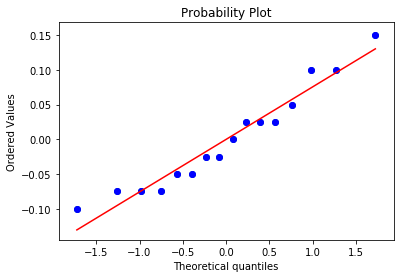

In [272]:
coords, z = stats.probplot(resids.unstack(), plot=plt)
x = coords[0]
y = coords[1]

plt.scatter(x, y)
plt.show()

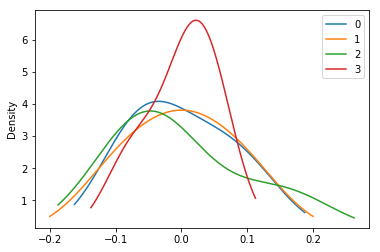

In [273]:
#by tip
resids.plot.density()

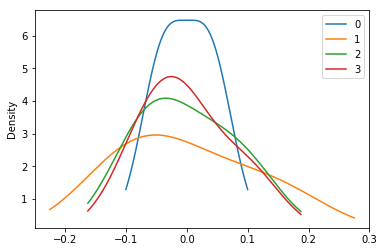

In [275]:
#by specimen
resids.transpose().plot.density()

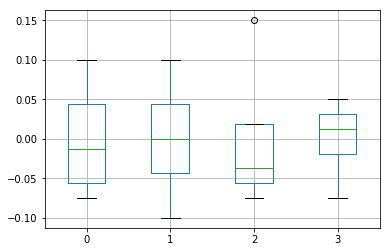

In [276]:
# by tip
resids.boxplot()

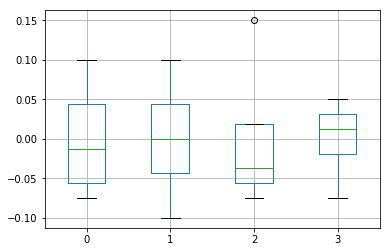

In [277]:
# by specimen
resids.boxplot()

Overall the variation in the residuals is fairly uniform. Normality assumptions seem to be valid.

## 6. 14-2

### 14-2 (a) 
$H_{0}: \tau_{1} = \tau_{2} = 0$  
$H_{1}:$ at least one $\tau_{i} \neq 0$  
$H_{0}: \beta_{1} = \beta_{2} = \beta_{3} = 0$  
$H_{1}:$ at least one $\beta_{j} \neq 0$  
$H_{0}: (\tau\beta)_{11} = (\tau\beta)_{12} = . . . = (\tau\beta)_{23} = 0$   
$H_{1}:$ at least one $(\tau\beta)_{ij} \neq 0$  

### 14-2 (b)


In [278]:
#load data
data = pd.DataFrame({'Paint': [1, 1, 1, 1, 1, 1, 1, 1, 1, 
                               2, 2, 2, 2, 2, 2, 2, 2, 2], 
                     'Time': [1, 2, 3, 1, 2, 3, 1, 2, 3, 
                                  1, 2, 3, 1, 2, 3, 1, 2, 3], 
                     'Finish': [74, 73, 78, 
                                64, 61, 85, 
                                50, 44, 92, 
                                92, 98, 66, 
                                86, 73, 45, 
                                68, 88, 85]})
data

,Paint,Time,Finish
0,1,1,74
1,1,2,73
2,1,3,78
3,1,1,64
4,1,2,61
5,1,3,85
6,1,1,50
7,1,2,44
8,1,3,92
9,2,1,92


In [279]:
total_sum = data['Finish'].sum()
a = 2
b = 3
n = 3
big_mean_square = (total_sum**2) / (a * b * n)
big_mean_square

97093.55555555556

In [283]:
flipdata = data.transpose()
# get counts and totals for the means
a1_sum = a2_sum = b1_sum = b2_sum = b3_sum =0
ab11_sum = ab12_sum = ab13_sum = ab21_sum = ab22_sum = ab23_sum = 0
a1_count = a2_count = b1_count = b2_count = b3_count = 0
for i in flipdata:
    col = flipdata[i]
    y = col['Finish']
    if col['Paint'] == 1:
        a1_sum += y
        a1_count += 1
        if col['Time'] == 1:
            b1_sum += y
            b1_count += 1
            ab11_sum += y
        elif col['Time'] == 2:
            b2_sum += y
            b2_count += 1
            ab12_sum += y
        elif col['Time'] == 3:
            b3_sum += y
            b3_count += 1
            ab13_sum += y
    elif col['Paint'] == 2:
        a2_sum += y
        a2_count += 1
        if col['Time'] == 1:
            b1_sum += y
            b1_count +=1
            ab21_sum += y
        elif col['Time'] == 2:
            b2_sum += y
            b2_count += 1
            ab22_sum += y
        elif col['Time'] == 3:
            b3_sum += y
            b3_count += 1
            ab23_sum += y

# calclate means        
a1_mean = a1_sum / a1_count
a2_mean = a2_sum / a2_count
b1_mean = b1_sum / b1_count
b2_mean = b2_sum / b2_count
b3_mean = b3_sum / b3_count



In [ ]:
# MSA, MSB, MSAB, MSE = SS/df
MSA = SSA/df_A
MSB = SSB/df_B
MSAB = SSab/df_AB
MSE = SSE/df_error
F_0A = MSA/MSE
F_0B = MSB/MSE
F_0AB = MSAB/MSE
print('F_0 for Paint Type is {}'.format(F_0A))
print('F_0 for Drying Time is {}'.format(F_0B.round(2)))
print('F_0 for Interaction is {}'.format(F_0AB.round(2)))